In [15]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import math
import cv2


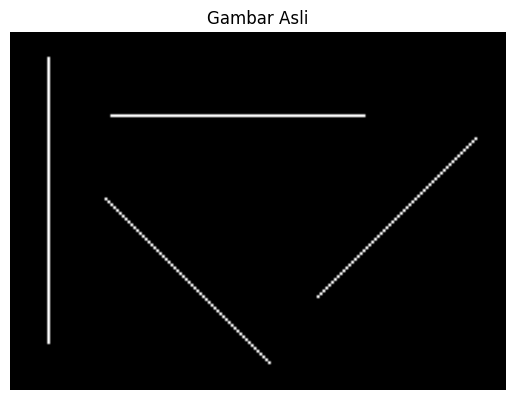

In [16]:
    # Baca gambar
    image_path = "line.png"
    image = cv2.imread(image_path)
    
    # Tampilkan gambar awal
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')
    plt.show()

In [17]:
# Definisikan fungsi hough_line
def hough_line(edge):
    # Theta 0 - 180 derajat
    # Hitung nilai 'cos' dan 'sin' sebelumnya untuk meningkatkan waktu eksekusi
    theta = np.arange(0, 180, 1)
    cos = np.cos(np.deg2rad(theta))
    sin = np.sin(np.deg2rad(theta))

    # Buat matriks akumulator untuk menyimpan nilai
    rho_range = round(math.sqrt(edge.shape[0]**2 + edge.shape[1]**2))
    accumulator = np.zeros((2 * rho_range, len(theta)), dtype=np.uint8)

    # Ambang untuk mendapatkan lokasi pixel tepi (x,y)
    edge_pixels = np.where(edge == 255)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # Hitung nilai rho untuk setiap lokasi tepi (x,y) dengan semua rentang theta
    for p in range(len(coordinates)):
        for t in range(len(theta)):
            rho = int(round(coordinates[p][1] * cos[t] + coordinates[p][0] * sin[t]))
            accumulator[rho, t] += 2  # Asumsikan menambahkan 1 saja, hanya ingin mendapatkan hasil yang jelas

    return accumulator

In [18]:
# Konversi ke citra skala abu-abu
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Proses dengan Gaussian Blur
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Proses edge detection menggunakan Canny
edges = cv2.Canny(blurred, 50, 150)

# Deteksi garis menggunakan transformasi Hough
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

In [19]:
# Gambar garis yang terdeteksi di atas gambar asli
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

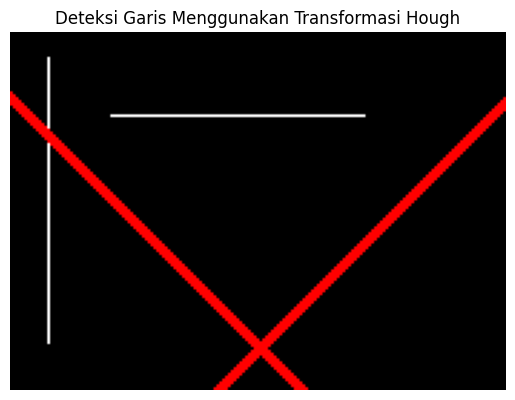

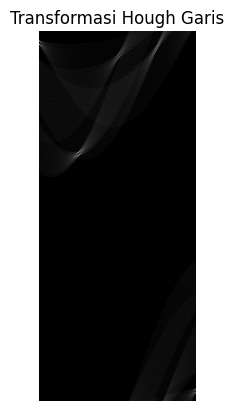

In [20]:
# Proses transformasi Hough garis menggunakan fungsi yang telah didefinisikan
accumulator = hough_line(edges)

# Tampilkan gambar dengan garis yang terdeteksi
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Garis Menggunakan Transformasi Hough')
plt.axis('off')
plt.show()

# Tampilkan hasil transformasi Hough garis
plt.imshow(accumulator, cmap='gray')
plt.title('Transformasi Hough Garis')
plt.axis('off')
plt.show()